### Linear Regression


Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable `y`. The variable you are using to predict the other variable's value is called the independent variable `x`.

<img src="https://www.superheuristics.com/wp-content/uploads/2018/10/Equation-of-Linear-Regression.png" width = 540px/></a>

<img src="https://cdn.ablebits.com/_img-blog/regression/linear-regression.png" title="source: imgur.com" /></a>  

Reference:
[Introduction to Regression](https://towardsdatascience.com/introduction-to-linear-regression-and-polynomial-regression-f8adc96f31cb),
[Linear Regression](https://towardsdatascience.com/linear-regression-using-python-b136c91bf0a2),
[Practical example of Linear Regression](https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155)

Let's take an example to explain Linear Regression.

# Step 1 : Importing Libraries


In [ ]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

# Step 2 : Data Read

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['advertising.csv']))

In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


#Step 3 : Data Preprocessing


## Checking for null values


In [ ]:
df.isnull().sum()*100/df.shape[0]

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

Since they aren't any null values, we can proceed further.

# Step 4 : Data Analysis

## Scatter plot


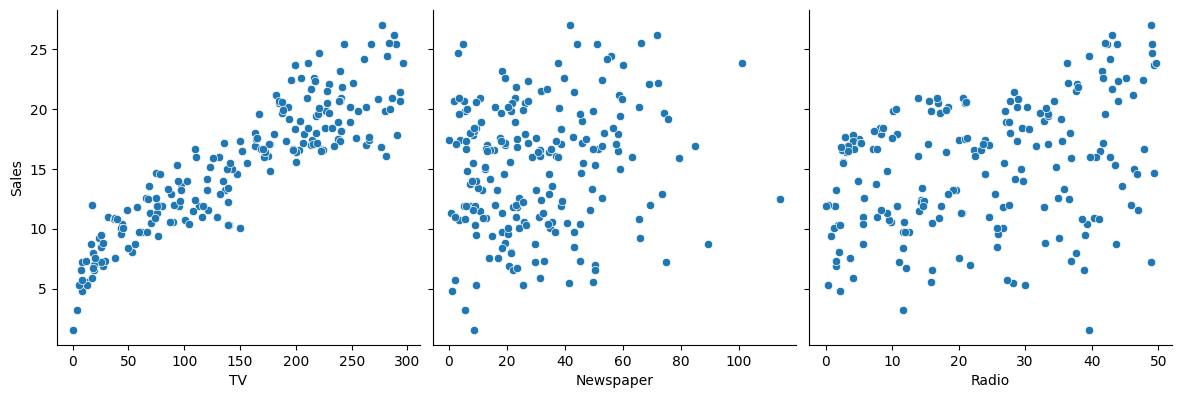

In [ ]:
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

## Correlation matrix

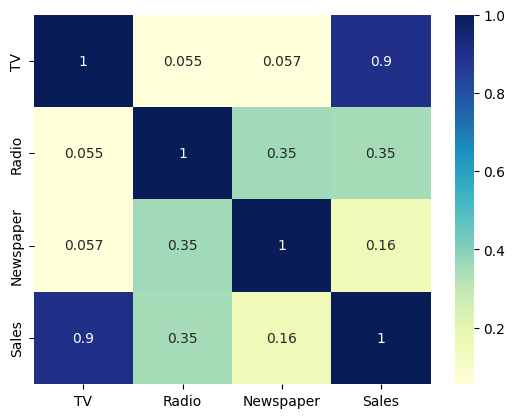

In [ ]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

As is visible from the pairplot and the heatmap, the variable TV is most correlated with Sales. So let's go ahead and perform simple linear regression using TV as our feature variable.


# Step 5 : Model Fitting



**Performing Simple Linear Regression**

Equation of linear regression

$y= $c + $m_{1}x_{1}$ + $m_{2}x_{2}$ + ... + $m_{n}x_{n}$




*   $y$ is the response
*   c is the intercept
*   $m_{1}$ is the coefficient for the first feature
*   $m_{n}$ is the coefficient for the nth feature



In our case:
$y(sales)$ = $c$ + $m_{1}$×$x(TV)$
  values are called the **model coefficients** or **model parameters**.

In [ ]:
X = df['TV']
y = df['Sales']



```
# This is formatted as code
```

## Train-Test Split

**NOTE** : This following library function splits the dataset with the parameters you enter. You can also spilt the train and test manually without using the library function.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)


In [ ]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [ ]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

In [ ]:
import statsmodels.api as sm

In [ ]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the regression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [ ]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const    6.948683
TV       0.054546
dtype: float64


The fit is significant. Let's visualise how well the model fits the data.

From the parameters that we get, our linear regression equation becomes:

*Sales = 6.948 + 0.054 × TV*

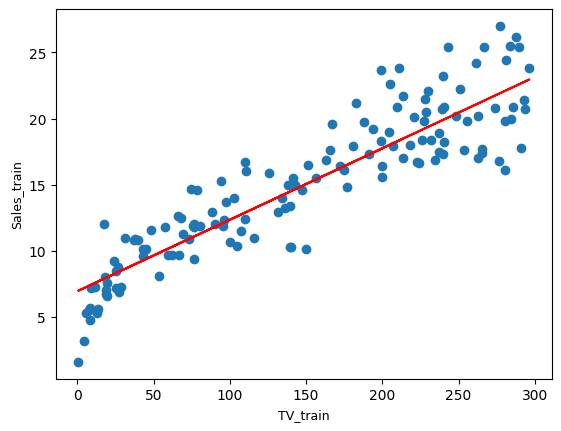

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.xlabel('TV_train', fontsize = 9)
plt.ylabel('Sales_train', fontsize = 9)
plt.show()

# Step 6 : Model Evaluation

In [ ]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)


In [ ]:
y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
accuracy = r2_score(y_test, y_pred)
print('The accuracy obtained is :',round(accuracy * 100 ,2),'%')


The accuracy obtained is : 79.21 %
